In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.random.seed(42)

In [ ]:
#Carregando os dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


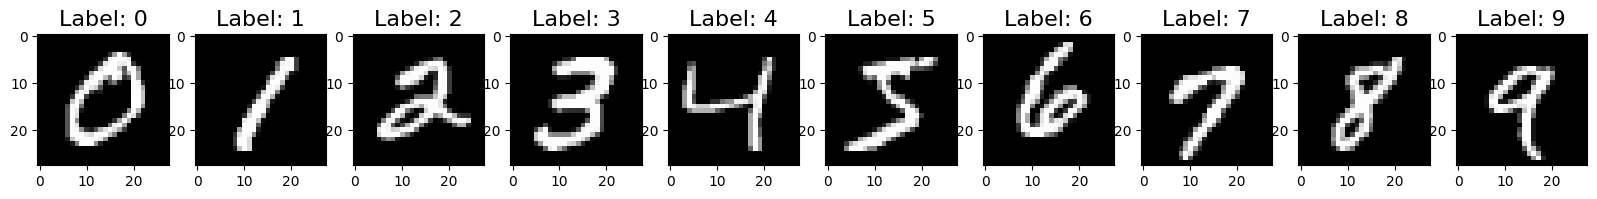

In [ ]:
#Vizualizando os dados
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
#Alterando o formato dos dados
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Normalizando
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [ ]:
#Modelo
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary ()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Treino
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 4ms/step - loss: 0.6149 - accuracy: 0.8219
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.2323 - accuracy: 0.9333
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1695 - accuracy: 0.9506
Epoch 4/10
118/118 [==============================] - 1s 4ms/step - loss: 0.1339 - accuracy: 0.9614
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1087 - accuracy: 0.9689
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0928 - accuracy: 0.9722
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0815 - accuracy: 0.9760
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0696 - accuracy: 0.9789
Epoch 9/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.9811
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0539 - accuracy: 0.9840

In [ ]:
#Evaluando
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy:{}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9768
Test Loss: 0.07571069151163101, Test Accuracy:0.9768000245094299


In [ ]:
#Predição
y_pred = model.predict((x_test))
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.9599131e-06 1.3405274e-06 2.7803791e-05 ... 9.9980372e-01
  1.3818864e-07 1.2650030e-05]
 [5.5704324e-10 5.3170101e-05 9.9955755e-01 ... 1.9538371e-09
  1.3320207e-06 1.5406456e-11]
 [9.4417992e-06 9.9767858e-01 4.8131964e-04 ... 9.0999244e-04
  1.9773033e-04 9.0439471e-06]
 ...
 [1.5299466e-10 1.1509820e-08 3.2976041e-10 ... 3.4929954e-07
  2.2291088e-07 4.5568654e-06]
 [5.2379401e-10 2.6891998e-09 8.9927737e-10 ... 3.8953161e-09
  2.8457354e-05 1.3496746e-08]
 [5.7261111e-09 5.4207421e-09 2.7503489e-07 ... 3.0964126e-10
  6.8372927e-08 8.4144020e-10]]
[7 2 1 ... 4 5 6]


In [ ]:
print(y_pred[0])
print(np.argmax(y_pred[0]))

[1.9599131e-06 1.3405274e-06 2.7803791e-05 1.4626209e-04 8.6979533e-08
 6.1381929e-06 4.4352046e-09 9.9980372e-01 1.3818864e-07 1.2650030e-05]
7


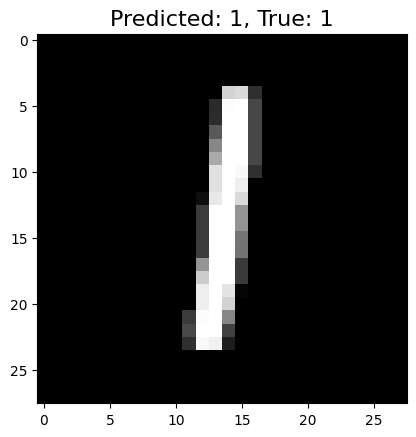

In [ ]:
# Verificando imagem X predição
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

Text(0.5, 1.0, 'Confusion Matrix')

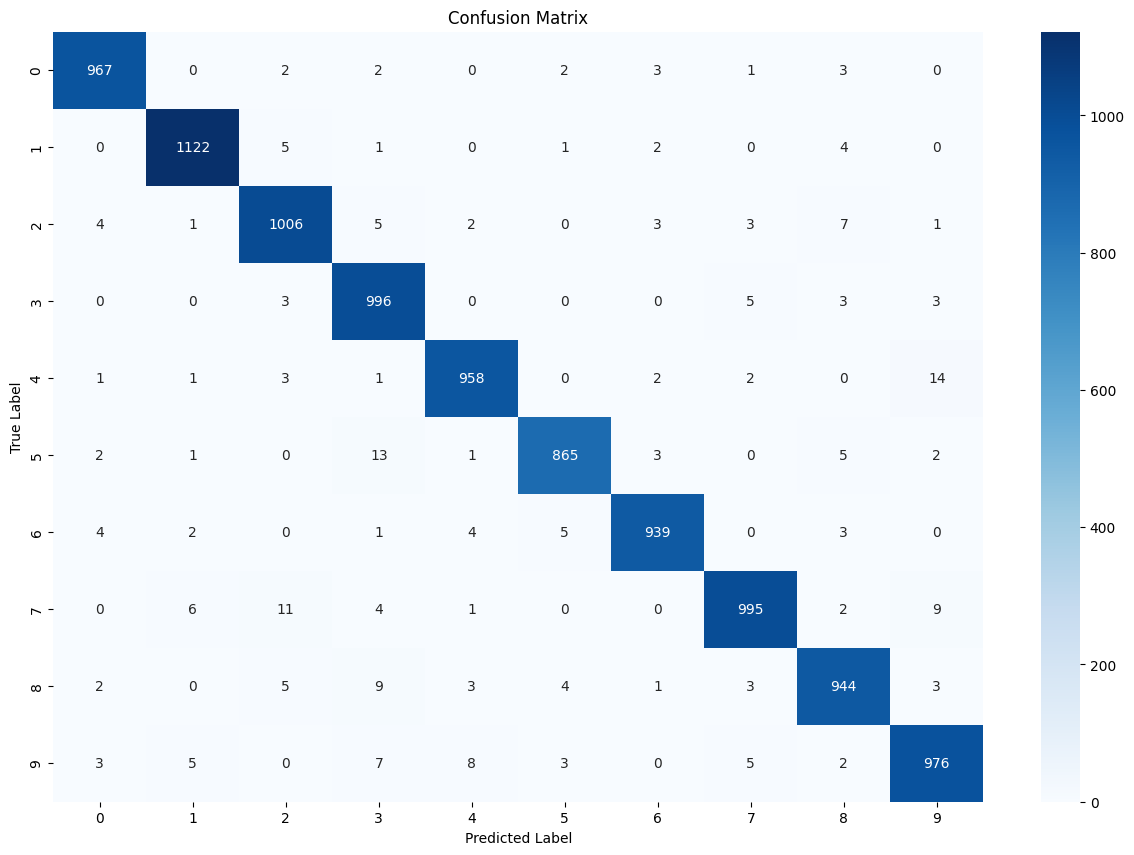

In [ ]:
#Matrix de confusão
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-10:] # 5 last ones

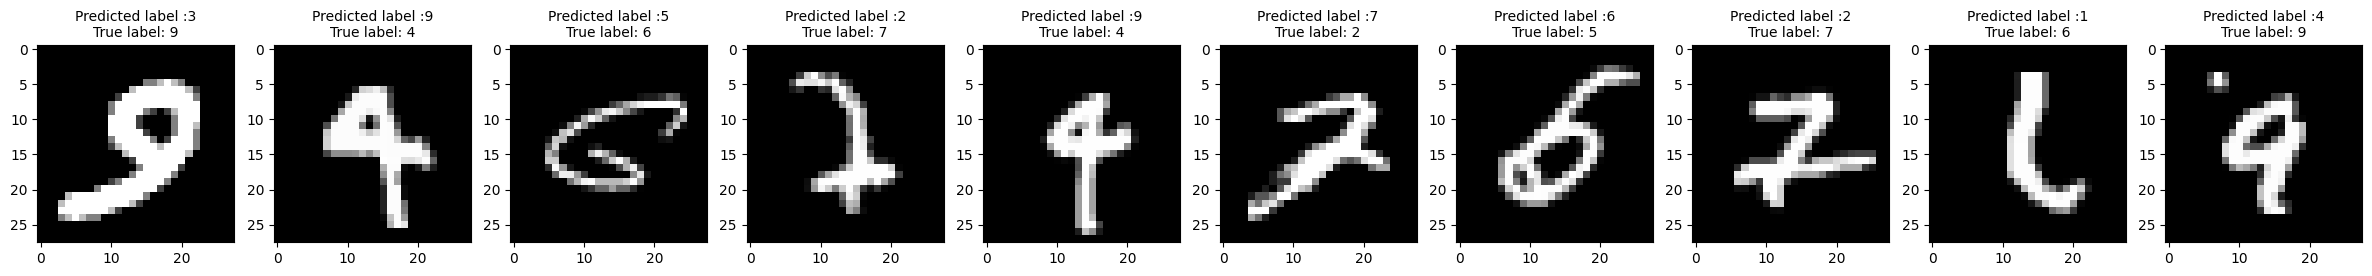

In [ ]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=10)